Data Preprocessing involves below steps:

- Getting the dataset
- Importing libraries
- Importing datasets
- Finding Missing Data
- Encoding Categorical Data
- Handling Duplicate Data
- Feature Scaling

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
data = pd.read_csv('Loan_Default.csv')
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,loan_amount,rate_of_interest,...,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,age,LTV,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,206500,NaN,...,lpsm,NaN,sb,pr,home,1U,4980.0,55-64,NaN,NaN
1,24892,2019,cf,Male,pre,type1,p1,l1,406500,4.560,...,not_lpsm,508000.0,sb,pr,home,1U,9480.0,35-44,80.019685,46.0
2,24893,2019,cf,Male,nopre,type1,p4,l1,456500,4.250,...,not_lpsm,658000.0,sb,pr,home,1U,11880.0,45-54,69.376900,42.0
3,24897,2019,NaN,Female,nopre,type1,p4,l1,266500,4.125,...,not_lpsm,308000.0,sb,pr,home,1U,3780.0,55-64,86.525974,42.0
4,24900,2019,cf,Male,nopre,type2,p3,l2,136500,NaN,...,not_lpsm,168000.0,sb,pr,home,1U,4020.0,55-64,81.250000,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69607,173553,2019,cf,Male,nopre,type2,p1,l1,106500,NaN,...,not_lpsm,NaN,sb,pr,home,1U,1860.0,<25,NaN,NaN
69608,173556,2019,cf,Male,nopre,type1,p1,l1,586500,5.190,...,not_lpsm,788000.0,sb,ir,home,4U,7140.0,25-34,74.428934,15.0
69609,173557,2019,cf,Male,nopre,type1,p4,l1,446500,3.125,...,not_lpsm,728000.0,sb,pr,home,1U,6900.0,45-54,61.332418,49.0
69610,173558,2019,cf,Female,nopre,type1,p4,l1,196500,3.500,...,not_lpsm,278000.0,sb,pr,home,1U,7140.0,55-64,70.683453,29.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69612 entries, 0 to 69611
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    69612 non-null  int64  
 1   year                  69612 non-null  int64  
 2   loan_limit            67961 non-null  object 
 3   Gender                69612 non-null  object 
 4   approv_in_adv         69178 non-null  object 
 5   loan_type             69612 non-null  object 
 6   loan_purpose          69546 non-null  object 
 7   Credit_Worthiness     69612 non-null  object 
 8   loan_amount           69612 non-null  int64  
 9   rate_of_interest      51673 non-null  float64
 10  Interest_rate_spread  51673 non-null  float64
 11  Upfront_charges       50285 non-null  float64
 12  term                  69593 non-null  float64
 13  Neg_ammortization     69551 non-null  object 
 14  interest_only         69612 non-null  object 
 15  lump_sum_payment   

It is the nullity matrix that allows us to see the distribution of data across all columns in the whole dataset. It also shows a sparkline (or, in some cases, a striped line) that emphasizes rows in a dataset with the highest and lowest nullity.

In [23]:
import missingno as msno

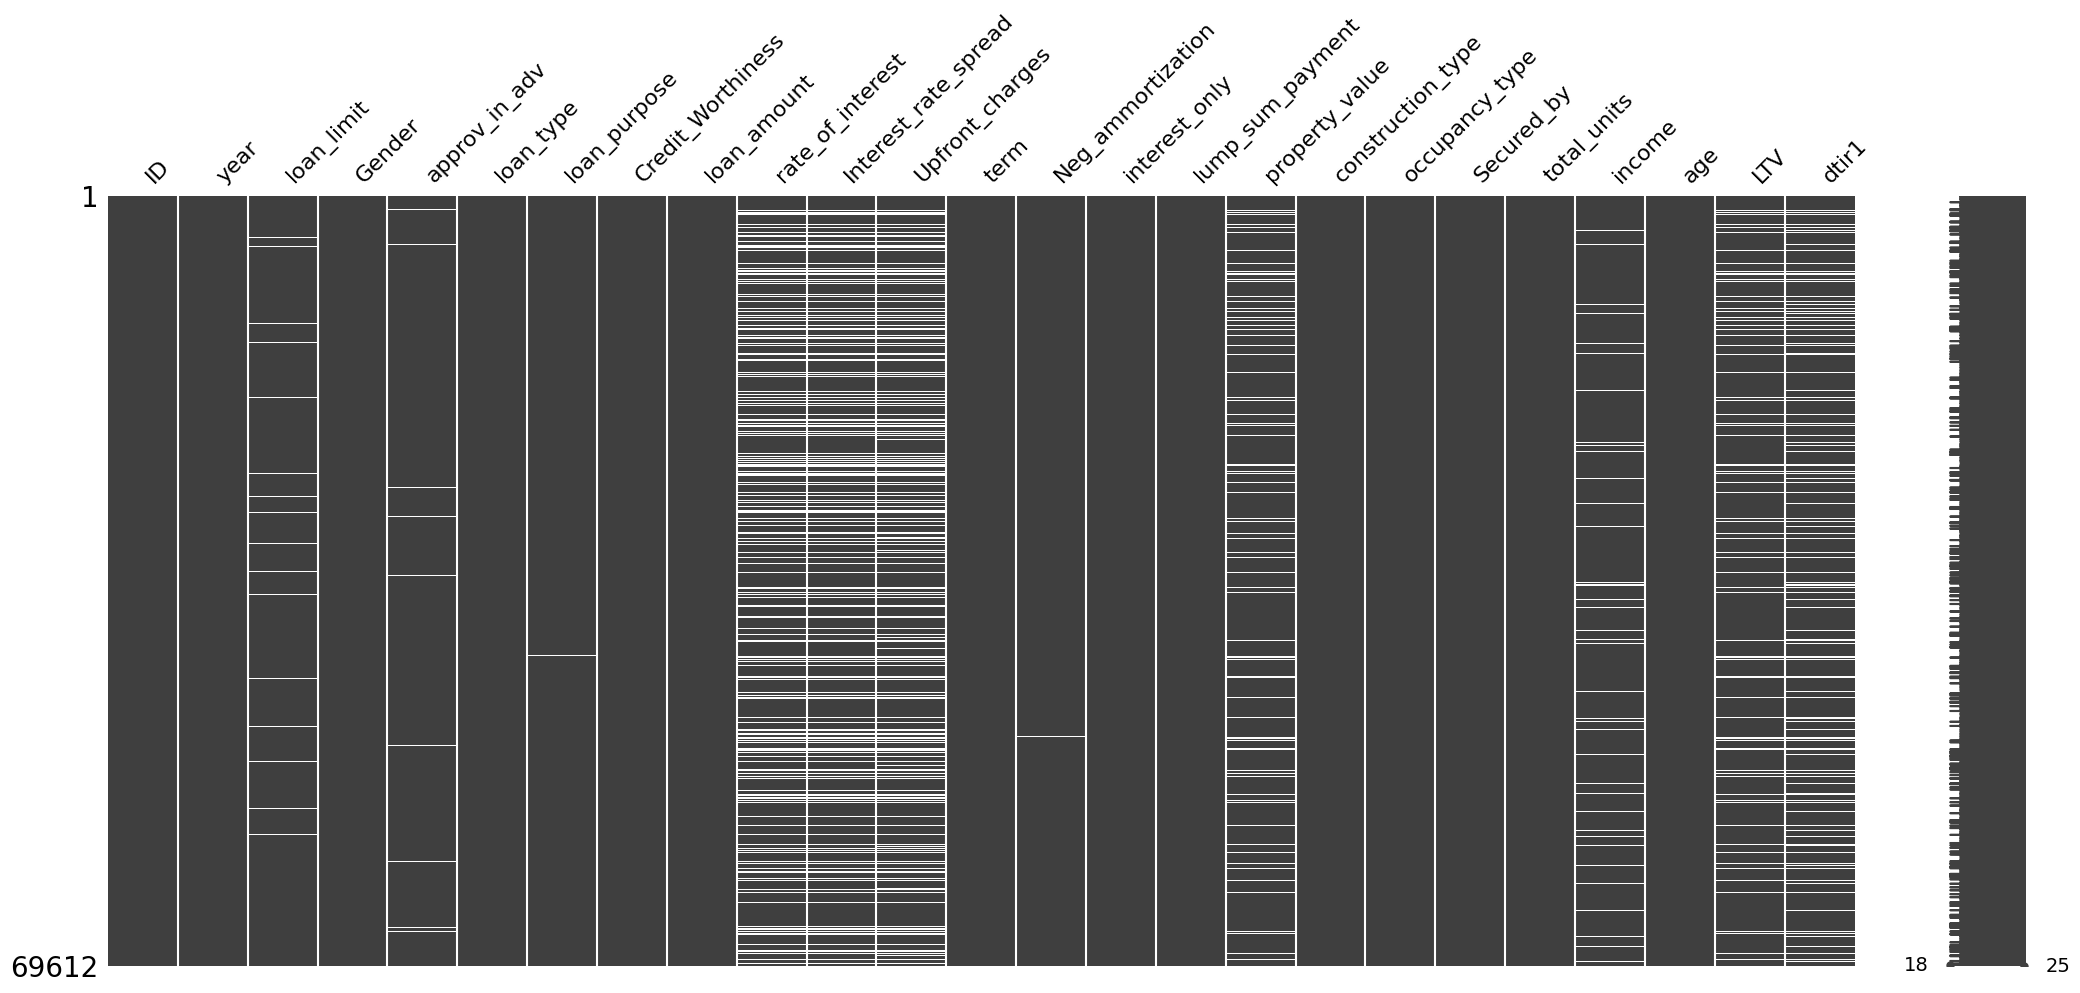

<Figure size 1000x500 with 0 Axes>

In [24]:
msno.matrix(data)
plt.figure(figsize=(10,5))
plt.show()

In [25]:
missing_col = [col for col in data.columns if data[col].isnull().any()]
missing_col

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [26]:
data.isnull().sum()

ID                          0
year                        0
loan_limit               1651
Gender                      0
approv_in_adv             434
loan_type                   0
loan_purpose               66
Credit_Worthiness           0
loan_amount                 0
rate_of_interest        17939
Interest_rate_spread    17939
Upfront_charges         19327
term                       19
Neg_ammortization          61
interest_only               0
lump_sum_payment            0
property_value           7307
construction_type           0
occupancy_type              0
Secured_by                  0
total_units                 0
income                   3455
age                         0
LTV                      7307
dtir1                   10704
dtype: int64

In [27]:
def missing_percent(df):
    missing = df.isnull().sum()
    total = df.isnull().count()
    percent = (missing/total)*100
    percent = round(percent,2)
    return percent

missing_percent(data)

ID                       0.00
year                     0.00
loan_limit               2.37
Gender                   0.00
approv_in_adv            0.62
loan_type                0.00
loan_purpose             0.09
Credit_Worthiness        0.00
loan_amount              0.00
rate_of_interest        25.77
Interest_rate_spread    25.77
Upfront_charges         27.76
term                     0.03
Neg_ammortization        0.09
interest_only            0.00
lump_sum_payment         0.00
property_value          10.50
construction_type        0.00
occupancy_type           0.00
Secured_by               0.00
total_units              0.00
income                   4.96
age                      0.00
LTV                     10.50
dtir1                   15.38
dtype: float64

In [28]:
dtypes = pd.DataFrame(data.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [29]:
num_vars

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [33]:
data[num_vars].isna().sum()

ID                          0
year                        0
loan_amount                 0
rate_of_interest        17939
Interest_rate_spread    17939
Upfront_charges         19327
term                       19
property_value           7307
income                   3455
LTV                      7307
dtir1                   10704
dtype: int64

In [34]:
data[cat_vars].isna().sum()

loan_limit           1651
Gender                  0
approv_in_adv         434
loan_type               0
loan_purpose           66
Credit_Worthiness       0
Neg_ammortization      61
interest_only           0
lump_sum_payment        0
construction_type       0
occupancy_type          0
Secured_by              0
total_units             0
age                     0
dtype: int64

In [11]:
cat_vars

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'age']